# ***MUSIC GENRE CLASSIFICATION AND RECOMMENDATION***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
import streamlit as slt
import pickle
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
cli_id = "3ed54b2fd9814e77a983ea3909f2f512"
cli_secret = "704523733d55478f9b3e331497da3604"

client_credentials_manager = SpotifyClientCredentials(client_id=cli_id,client_secret=cli_secret)


In [4]:
# sp = spotipy.Spotify(auth_manager=client_credentials_manager)

# results = sp.search(q='track:'+'baby',type='track')
# results['tracks']

In [5]:
df = pd.read_csv('genres_v2.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,...,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,...,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,...,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,...,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,...,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,...,audio_features,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl,NaN
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,...,audio_features,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94,NaN
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,...,audio_features,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live,NaN
21523,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,0.7330,...,audio_features,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,Can't Hold On,NaN


In [6]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name               6
Unnamed: 0          21525
dtype: int64

***Feature Engineering***

In [7]:
df.insert(loc=0, column='track_id', value=df.set_index(['song_name']).index.factorize()[0]+1)
df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0
0,1,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,...,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN
1,2,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,...,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN
2,3,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,...,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN
3,4,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,...,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN
4,5,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,...,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,15433,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,...,audio_features,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl,NaN
21521,15434,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,...,audio_features,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94,NaN
21522,15435,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,...,audio_features,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live,NaN
21523,15436,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,...,audio_features,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,Can't Hold On,NaN


In [8]:
# High-energy tracks can have a different impact on listeners
df['high_energy'] = df['energy'].apply(lambda x: 1 if x > 0.5 else 0)

#Users might have preferences for vocal-driven songs
speechiness_threshold = 0.5
df['high_speechiness'] = df['speechiness'].apply(lambda x: 1 if x > speechiness_threshold else 0)

# Example 4: Some may prefer slower songs
num_bins = 5
df['tempo_category'] = pd.cut(df['tempo'], bins=num_bins, labels=['slow', 'moderate', 'medium', 'fast', 'very fast'])

# Example 5: Creating a column for track duration in second
df['duration_second'] = df['duration_ms'] / 1000

# Save the modified dataset if needed
df.to_csv('modified_dataset.csv', index=True)  # Replace 'modified_dataset.csv' with the desired file path

df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,high_energy,high_speechiness,tempo_category,duration_second
0,1,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,1,0,fast,124.539
1,2,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,0,0,moderate,224.427
2,3,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,1,0,very fast,98.821
3,4,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,1,0,fast,123.661
4,5,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,1,0,medium,123.298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,15433,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl,NaN,1,0,fast,209.582
21521,15434,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94,NaN,1,0,medium,213.898
21522,15435,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live,NaN,1,0,fast,271.867
21523,15436,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,Can't Hold On,NaN,1,0,very fast,182.040


***Preprocessing***

In [9]:
df = df.drop_duplicates(subset=['song_name'], keep='first')
df.drop(['Unnamed: 0', 'type'], axis=1,inplace=True)


In [10]:
Mtr = df["song_name"].copy()
Mtr1 = df[["genre"]].copy()
le = LabelEncoder()
df = df.apply(lambda x: le.fit_transform(x))
Mtr.head()

0                              Mercury: Retrograde
1                                        Pathology
2                                         Symbiote
3    ProductOfDrugs (Prod. The Virus and Antidote)
4                                            Venom
Name: song_name, dtype: object

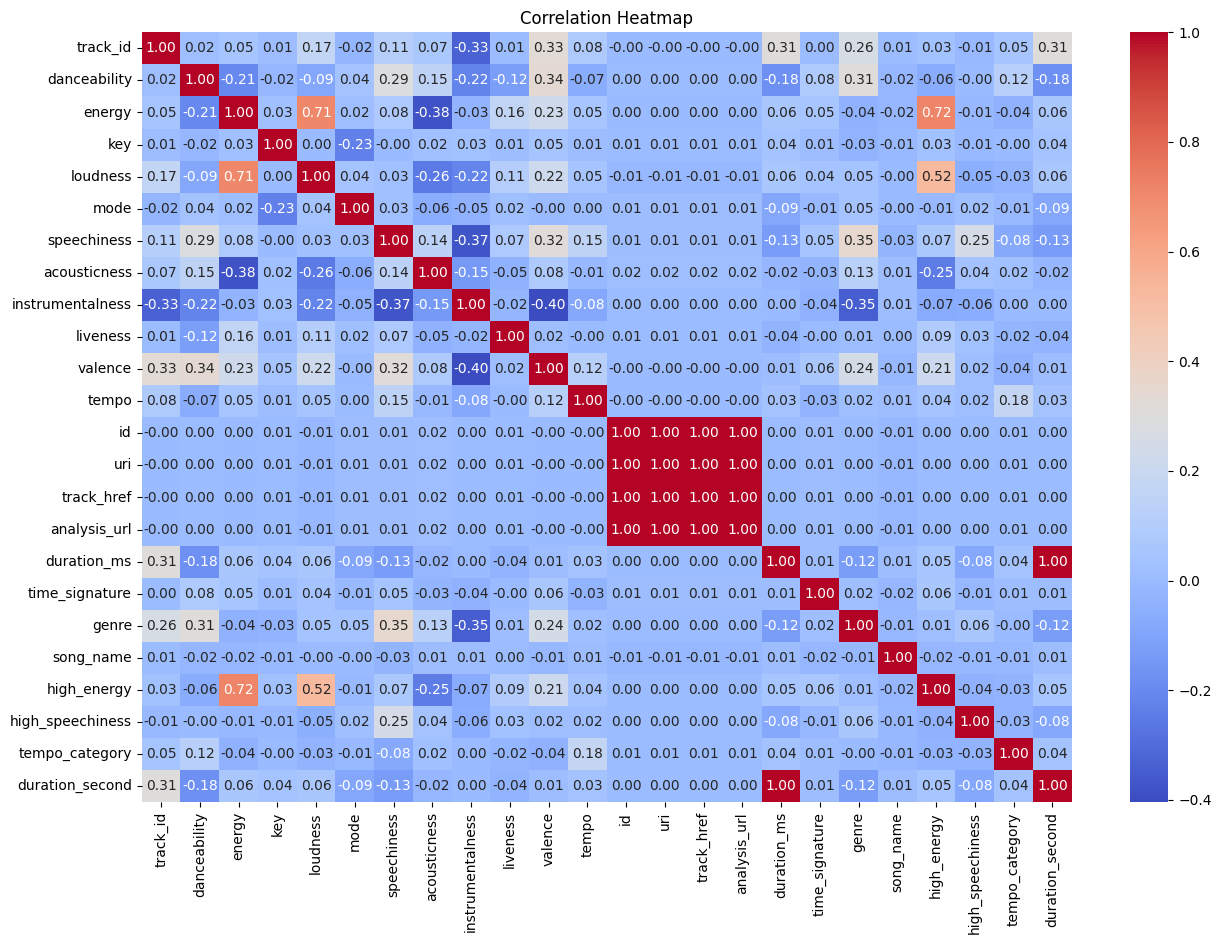

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

***Feature Selection***

In [12]:
# Train Test Split

X = df[['danceability','acousticness','speechiness','instrumentalness','valence','duration_ms']]
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))                                        #one feature might dominate other in distance

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

### ***Model_1: KNN Classification***

Hyper parameter Tuning

In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV                     # Grid Search technique
grid_params = { 'n_neighbors' : [5,7,9,11,13,15,80],
               'weights' : ['uniform','+distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

g_res.best_score_

g_res.best_params_


def knn_model():

    knn_classifier = KNeighborsClassifier(n_neighbors = g_res.best_params_['n_neighbors'], weights = g_res.best_params_['weights'],algorithm = 'brute', metric=g_res.best_params_['metric'])

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of k-NN Classifier with k={g_res.best_params_['n_neighbors']}: {accuracy * 100:.2f}%")

    
knn_model()

Fitting 3 folds for each of 42 candidates, totalling 126 fits
Accuracy of k-NN Classifier with k=80: 49.72%


In [14]:
from sklearn.model_selection import cross_val_score                # Cross Validation technique
from sklearn.neighbors import KNeighborsClassifier


def choose_best_k(X, y, k_values, cv=5):
    best_k = None
    best_score = 0

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv)
        avg_score = scores.mean()
        print(f"k: {k}, Average Cross-Validation Score: {avg_score:.2f}")
        if avg_score > best_score:
            best_k = k
            best_score = avg_score
    return best_k

def knn_model():
    k = choose_best_k(X,y,[3,5,7,9,11,80],cv=5)

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of k-NN Classifier with k={k}: {accuracy * 100:.2f}%")
    
knn_model()

k: 3, Average Cross-Validation Score: 0.40
k: 5, Average Cross-Validation Score: 0.41
k: 7, Average Cross-Validation Score: 0.43
k: 9, Average Cross-Validation Score: 0.43
k: 11, Average Cross-Validation Score: 0.44
k: 80, Average Cross-Validation Score: 0.45
Accuracy of k-NN Classifier with k=80: 49.33%


In [15]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Creating a dictionary to map track names to indices
song_name_to_index = {str(song_name).lower(): index for index, song_name in enumerate(Mtr)}
#song_name_to_index = pd.Series(song_name_to_index)

def recommend_songs_by_name(input_song_name, k_value, dataset):
    
    input_song_name = str(input_song_name).lower()             # Checking if the input song name exists in the mapping dictionary

    if input_song_name not in song_name_to_index:
        return "Song not found in the dataset"

    input_song_index = song_name_to_index[input_song_name]     # Getting the index of the input song


    knn_model = NearestNeighbors(n_neighbors=k_value, algorithm='auto')          # Initializinh the NearestNeighbors model
    knn_model.fit(dataset[['danceability','energy','acousticness','instrumentalness','tempo','duration_ms']])

    # Finding K-nearest neighbors of input song
    _, indices = knn_model.kneighbors([dataset.iloc[input_song_index][['danceability','energy','acousticness','instrumentalness','tempo','duration_ms']]])

    recommended_song_names = dataset.iloc[indices[0]]['track_id']                   # Get the track IDs of the recommended songs


    return recommended_song_names


In [16]:
input_song_name = input("Enter a song for recommendations: ")
k_value = int(input("No of recommendation: "))  # You can adjust the number of recommendations

# Get song recommendations
recommendations = recommend_songs_by_name(input_song_name, k_value, df)

if isinstance(recommendations, str):
    print(recommendations)  # Song not found in the dataset
else:
    print(f"\nRecommended Songs for '{input_song_name}':\n")
    for song_id in recommendations:
        print(Mtr.iloc[song_id])
        print(Mtr1.iloc[song_id])
        print(" ")


Recommended Songs for 'venom':

Gatteka
genre    Dark Trap
Name: 5, dtype: object
 
Got My Mind Made Up
genre    Underground Rap
Name: 8282, dtype: object
 
O' Lord! I Have My Doubts
genre    Dark Trap
Name: 2119, dtype: object
 
Operation Wop
genre    Underground Rap
Name: 9688, dtype: object
 
Yeezys
genre    Underground Rap
Name: 6539, dtype: object
 


***Genre Classification***

In [17]:
input_song_name = input("Enter a song for recommendations: ")
recommendations = recommend_songs_by_name(input_song_name,1, df)

if isinstance(recommendations, str):
    print(recommendations)  # Song not found in the dataset
else:
    print(f"\nRecommended Songs for '{input_song_name}':\n")
    res = recommendations
    print(Mtr1.iloc[res])
    


Recommended Songs for 'venom':

       genre
5  Dark Trap


Loss Curve

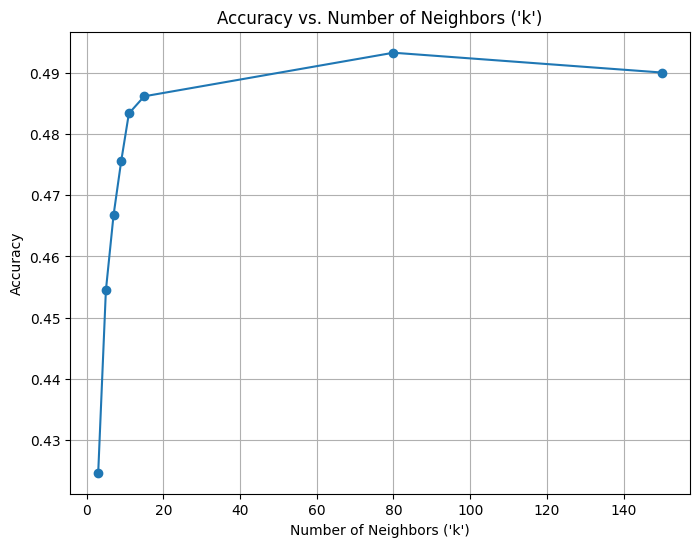

In [22]:
k_values = [3, 5, 7, 9, 11, 15,80,150]
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs. Number of Neighbors ('k')")
plt.xlabel("Number of Neighbors ('k')")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Loss curves are typically used to monitor the training progress for model prediction.
In the context of decision tree-based algorithms like Random Forest and instance-based algorithms like k-Nearest Neighbors (KNN), loss curves are not commonly used because these algorithms do not involve the same iterative optimization process 

PERFORMANCE METRICS

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))

Precision Score :  0.4900690846286701
Recall Score :  0.4900690846286701
F1 Score :  0.4900690846286701


### ***Model_2: Naive Bayes Classifier***

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix X and target vector y defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the Naive Bayes classifier to the training data
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.3338730569948187


***VISUALIZATION***

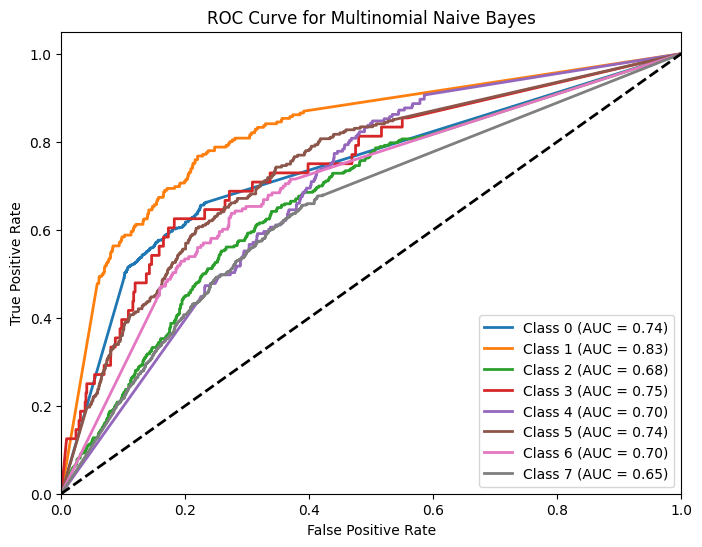

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB

# Predict probabilities for each class
y_scores = nb_classifier.predict_proba(X_test)

# Binarize the labels (one-hot encode the classes)
n_classes = len(np.unique(y))
y_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize dictionaries to store ROC curves and AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.show()


***Performance Metric***

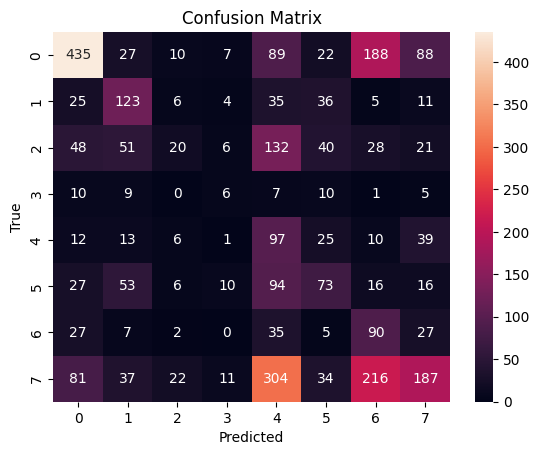

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


### ***Model_3: Random Forest Classifier***

In [27]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

k = 5
# Use cross_val_score to obtain an array of scores for each fold
scores = cross_val_score(clf, X, y, cv=k)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)  # For classification

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

for fold, score in enumerate(scores, 1):
    print(f'Fold {fold} Score: {score:.2f}')

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_dev = np.std(scores)

print(f'Mean Score: {mean_score:.2f}')
print(f'Standard Deviation: {std_dev:.2f}')

# Perform evaluation on the test set (e.g., accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy: 0.5087435233160622
Fold 1 Score: 0.47
Fold 2 Score: 0.42
Fold 3 Score: 0.43
Fold 4 Score: 0.56
Fold 5 Score: 0.54
Mean Score: 0.48
Standard Deviation: 0.06
Accuracy on Test Set: 0.5087435233160622


***HYPER PARAMETER TUNING***

In [28]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest Classifier with desired parameters
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define your feature matrix (X) and target vector (y)

# Split the data into training and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
# You can perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV

# Example using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
clf = grid_search.best_estimator_

# Feature Selection
# You can use feature selection techniques to choose the most important features

# Example using SelectFromModel with feature importance
from sklearn.feature_selection import SelectFromModel

feature_selector = SelectFromModel(clf)
feature_selector.fit(X_train, y_train)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Early Stopping
# Monitor validation performance and stop training if it deteriorates

# Example using early stopping with n_estimators
best_score = 0
best_n_estimators = None

for n_estimators in range(50, 1001, 50):
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_score:
        best_score = accuracy
        best_n_estimators = n_estimators
    else:
        # Stop training if accuracy starts decreasing
        break

print("Best Number of Estimators:", best_n_estimators)
print("Best Test Accuracy:", best_score)


Best Number of Estimators: 250
Best Test Accuracy: 0.5116580310880829


ERROR

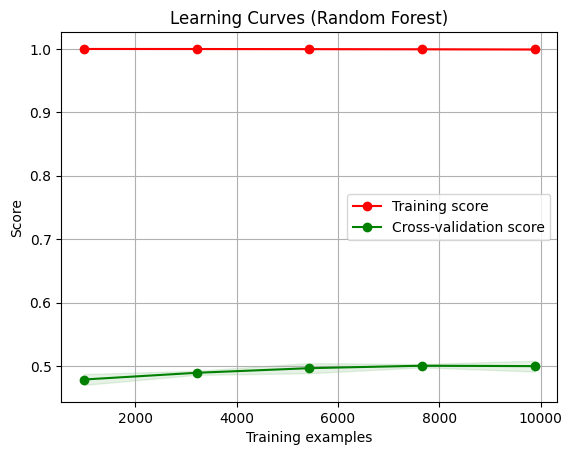

In [25]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you've already trained the RandomForestClassifier and obtained X_train, y_train
title = "Learning Curves (Random Forest)"
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=4)

plt.show()

***Performance Metrics***

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))


Precision Score :  0.5113341968911918
Recall Score :  0.5113341968911918
F1 Score :  0.5113341968911918


### ***Model_4: Decision Tree Classification***

In [27]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree

# Define a range of hyperparameter values to search
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}
tree_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X, y)

# Define a range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5)

best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# Create a Decision Tree classifier with the best hyperparameters
tree_classifier = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
tree_classifier.fit(X_train, y_train)

y_train_pred = tree_classifier.predict(X_test)
print(f"Accuracy of the model: {accuracy_score(y_test, y_train_pred)}")



Accuracy of the model: 0.48154145077720206


***Hyper Parameter tuning***

In [28]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameter values to search
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X, y)

# Define a range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5)

best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# Create a Decision Tree classifier with the best hyperparameters
tree_classifier = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
tree_classifier.fit(X_train,y_train)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(tree_classifier, X, y, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of accuracy for each training set size
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

***Visualization***

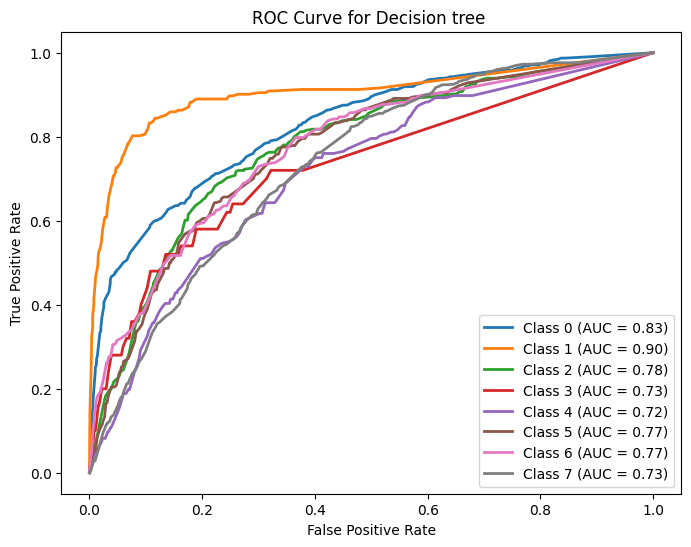

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Predict probabilities for each class
y_scores = tree_classifier.predict_proba(X_test)

# Binarize the labels (one-hot encode the classes)
n_classes = len(np.unique(y))
y_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize dictionaries to store ROC curves and AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

"""plt.plot([0, 1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])"""
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision tree ')
plt.legend(loc="lower right")
plt.show()

***Error***

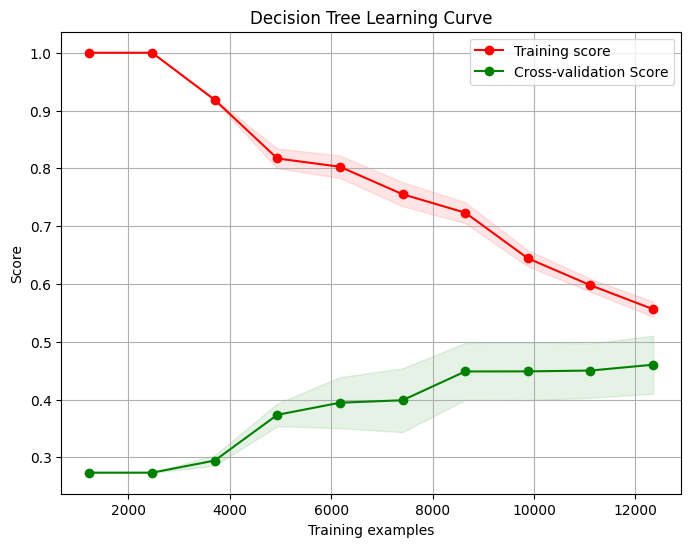

In [30]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()

we've reduced the error in the validation data. It came at the cost of weakened performance on the training data, but overall it's a better model.

The generalization error is much smaller, with a low number of errors being made. Also, both curves are stable beyond a training set size, which implies that adding more instances may not improve this model much further.

In summary, a model's behavior can be observed using learning curves. The ideal scenario when building machine learning models is to keep the error as low as possible.

***Performance Metrics***

In [31]:
# from sklearn.metrics import precision_score, recall_score, f1_score


# print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
# print("Recall Score : ",recall_score(y_test, y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))
# print("F1 Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))

### ***Dimensionality Reduction***

***PCA***

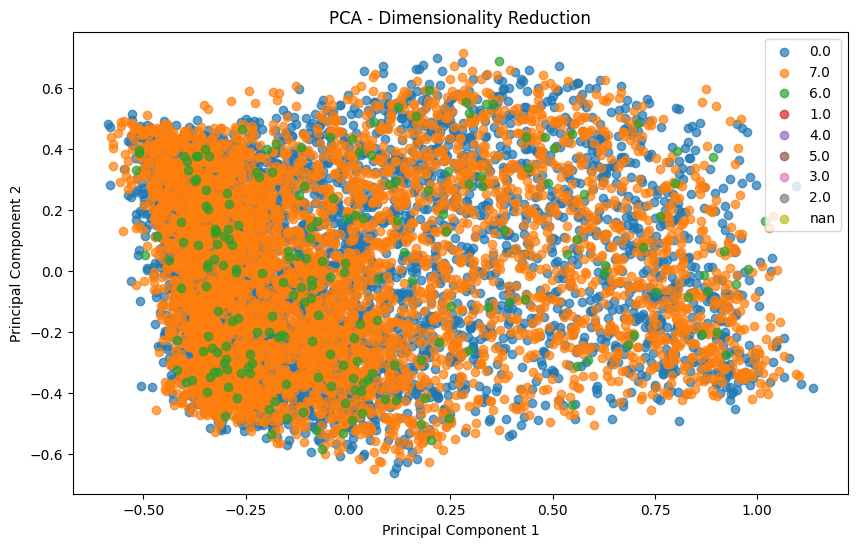

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_href,analysis_url,duration_ms,time_signature,genre,song_name,high_energy,high_speechiness,tempo_category,duration_second
0,1,659,696,2,3918,1,1079,2007,2355,196,...,4910,4910,1434,2,0,8343,1,0,0,1434
1,2,547,375,8,4034,1,554,2702,0,654,...,15113,15113,9081,2,0,9889,0,0,2,9081
2,3,678,775,5,6190,1,383,1549,287,908,...,1803,1803,446,2,0,12444,1,0,4,446
3,4,304,663,0,6255,1,762,1648,0,650,...,978,978,1390,1,0,10225,1,0,0,1390
4,5,626,506,2,3657,1,952,2518,0,702,...,9282,9282,1357,2,0,13868,1,0,1,1357


In [32]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
n_components = 2  # Set the desired number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(X_train_scaled)

# Create a DataFrame with the reduced dimensions
df_pca_result = pd.DataFrame(data=df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Concatenate the reduced dimensions with the original DataFrame
df_final = pd.concat([df[['genre']], df_pca_result], axis=1)

# Visualize the result (2D plot)
plt.figure(figsize=(10, 6))
for genre in df_final['genre'].unique():
    genre_data = df_final[df_final['genre'] == genre]
    plt.scatter(genre_data['PC1'], genre_data['PC2'], label=genre, alpha=0.7)

plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

df.head()



--> Similar PC1 and PC2 values imply that these observations share similar patterns or trends in the original features.
It suggests that these data points exhibit comparable characteristics based on the major variations represented by PC1 and PC2

 ***L1 regularization***

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame

# Encode the 'genre' labels to numerical values
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])

# Define features and target
X = df[['danceability',	'energy',	'key',	'loudness',	'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo', 'duration_ms',	'time_signature']]
y = df['genre_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Use SelectFromModel for feature selection with a threshold
sfm = SelectFromModel(logreg, threshold=2.5)  # Adjust the threshold as needed
X_train_selected = sfm.fit_transform(X_train_scaled, y_train)
X_test_selected = sfm.transform(X_test_scaled)

# Train the model on the selected features
logreg.fit(X_train_selected, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display selected features
selected_features = X.columns[sfm.get_support()]
print("\nSelected Features:")
print(selected_features)


Accuracy: 51.23%

Selected Features:
Index(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness',
       'valence', 'duration_ms'],
      dtype='object')


___

##### ***ENSEMBLE LEARNING***

-  Use of Bootstrap Aggregation for performing ensemble learning using decision tree as a model and splitting the dataset as samples.
* Accuracy of this method is noted and compared with the individual model to check the change in the performance and accuracy scores



***Decision Tree***

In [34]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),         # model used for all the samples
    n_estimators=100,                                # No of Samples(100 subsets of dataset)
    max_samples=0.8,                                 # Train split(no of training datas for each sample)
    oob_score=True                                   # trains the left over data from sample
                  
)

bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True)

In [35]:
res = bagging_model.predict(X_test)
print(f"Accuracy after ensemble: {accuracy_score(y_test, res)}")

Accuracy after ensemble: 0.5579663212435233


***SVM***

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Create a BaggingClassifier with SVM as the base estimator
bagged_svm = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10, random_state=42)

# Train the ensemble model
bagged_svm.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = bagged_svm.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 52.46%


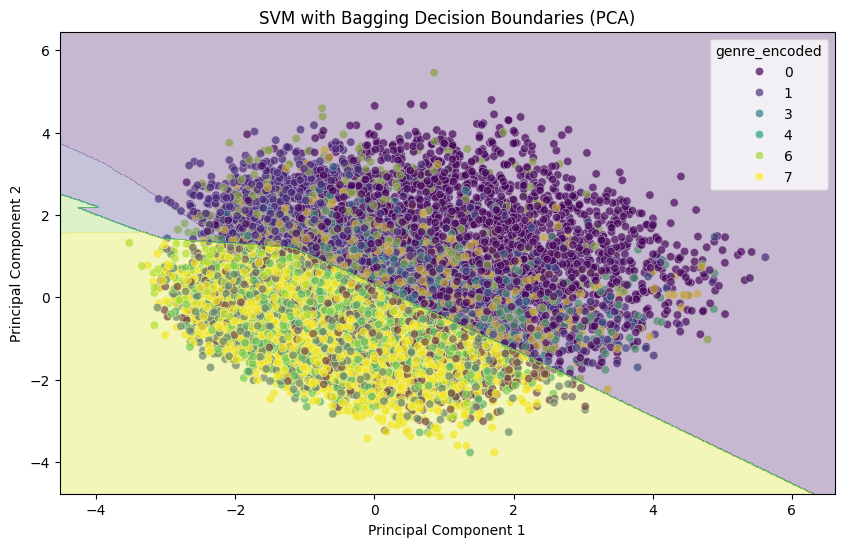

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame
# Encode the 'genre' labels to numerical values
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])

# Define features and target
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['genre_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Create a BaggingClassifier with SVM as the base estimator
bagged_svm = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10, random_state=42)

# Train the ensemble model
bagged_svm.fit(X_train_pca, y_train)

# Create a meshgrid for plotting
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predictions on the meshgrid
Z = bagged_svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions
Z = Z.reshape(xx.shape)

# Plot the decision boundaries using sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', alpha=0.7)
plt.contourf(xx, yy, Z, alpha=0.3, levels=10, cmap='viridis')
plt.title('SVM with Bagging Decision Boundaries (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


___

### ***UNSUPERVISED LEARNING***

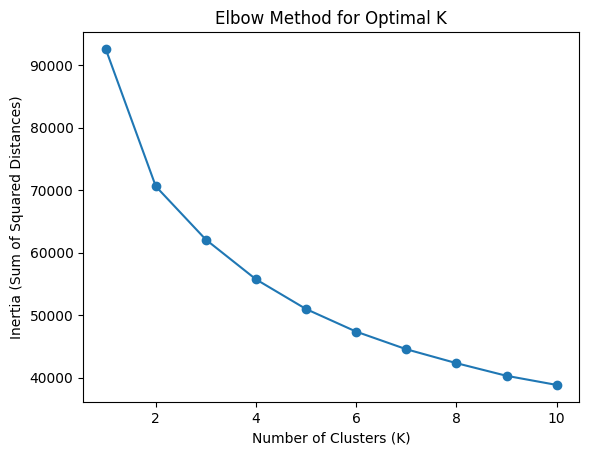

       danceability  acousticness  speechiness  instrumentalness  valence  \
0               659          2007         1079              2355      866   
1               547          2702          554                 0      601   
2               678          1549          383               287       73   
3               304          1648          762                 0      652   
4               626          2518          952                 0     1068   
...             ...           ...          ...               ...      ...   
21519           354           824          957               230     1058   
21520           366          1388         1126                 0      729   
21521           243          2525          944                 0     1005   
21522           613          1568          938              1905      983   
21523           575          2534          844               674     1210   

       duration_ms  cluster  
0             1434        0  
1             9

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
selected_features = df[['danceability','acousticness','speechiness','instrumentalness','valence','duration_ms']]

# Standardize the features (important for K-means)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(selected_features)

# Determine the optimal number of clusters using the Elbow Method
# This is a simple heuristic to find the "elbow" point in the cost function vs. number of clusters plot
# where adding more clusters does not significantly reduce the cost
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_standardized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters
optimal_k = 8  # Adjust this based on the plot

# Apply K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(features_standardized)

# Display the results
print(df[['danceability','acousticness','speechiness','instrumentalness','valence','duration_ms','cluster']])

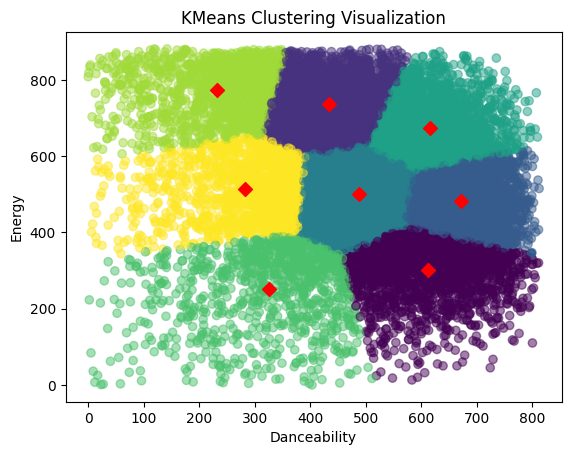

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data_for_kmeans = df[['danceability', 'energy']]

# Create a KMeans instance with 8 clusters (for 8 genres)
model = KMeans(n_clusters=8, random_state=42)

# Fit the model to your data
model.fit(data_for_kmeans)

# Determine the cluster labels of your data: labels
labels = model.predict(data_for_kmeans)

# Assign the columns of your data: xs and ys
xs = data_for_kmeans['danceability']
ys = data_for_kmeans['energy']

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50, c='red')  # Mark centroids in red

plt.title('KMeans Clustering Visualization')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

# Assuming 'df' is your DataFrame
data_for_kmeans = df[['danceability', 'energy']]

# Create a KMeans instance with the chosen number of clusters
model = KMeans(n_clusters=8, random_state=42)

# Fit the model to your data
model.fit(data_for_kmeans)

# Determine the cluster labels of your data: labels
labels = model.predict(data_for_kmeans)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(data_for_kmeans, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3257496010144578


***Hierarchical Clustering***

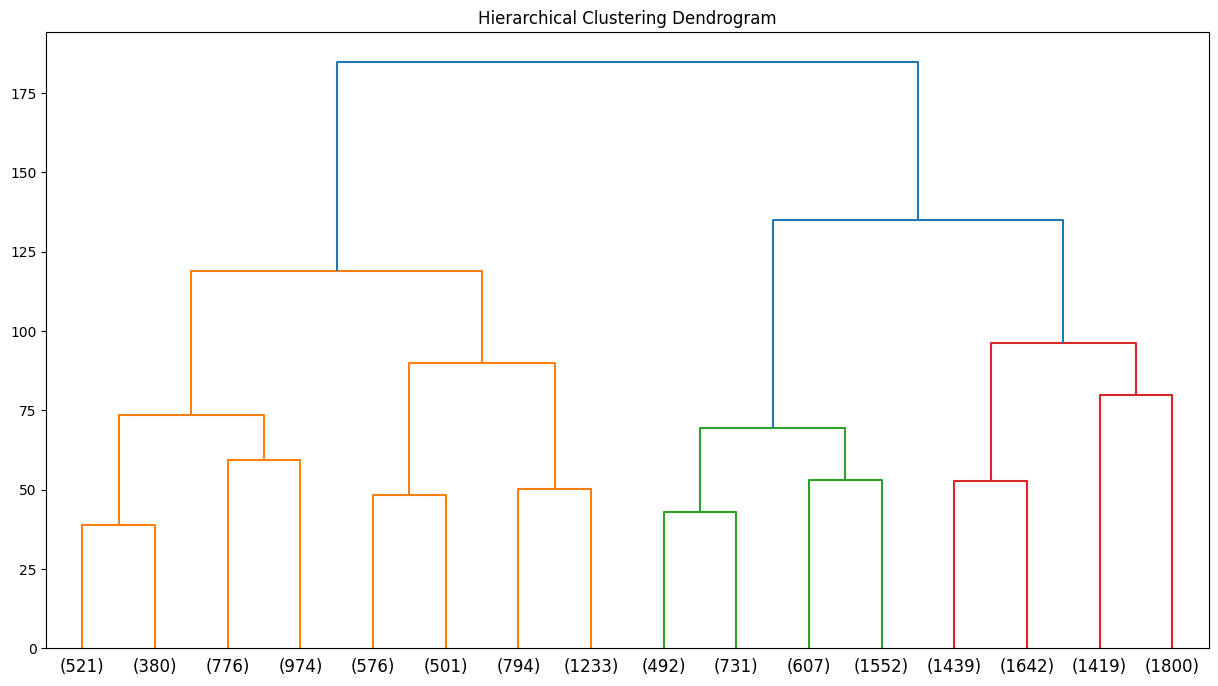

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'df' is your DataFrame
# Extract features for clustering (you can choose relevant features based on your problem)
features_for_clustering = df[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness','valence', 'duration_ms']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Apply hierarchical clustering
num_clusters = 3  # You can adjust the number of clusters based on your problem
clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='single')

# Fit and predict on the subset of data used for clustering
df['cluster'] = clustering.fit_predict(features_scaled)

# Plot dendrogram for hierarchical structure
plt.figure(figsize=(15, 8))
linkage_matrix = linkage(features_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=num_clusters)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

___

### ***Probabilistic model***

***Hidden Markov Models***

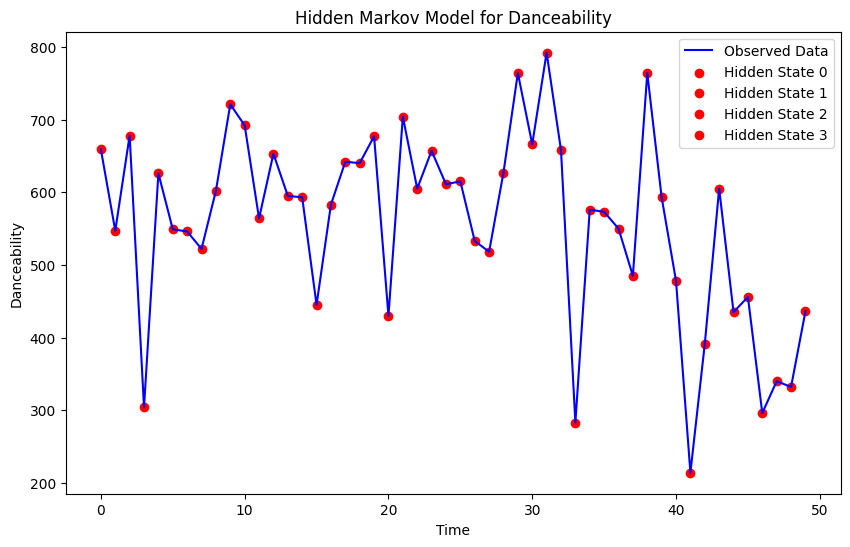

[0 0 0 2 0 0 2 2 0 3 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0 3 0 3 0 2 0 0 0
 2 2 0 2 1 1 1 1 1 1 1 1 1]


In [ ]:
from hmmlearn import hmm

observed_data = df[['danceability']].head(50)

# Standardize the features if needed
# scaler = StandardScaler()
# observed_data = scaler.fit_transform(observed_data)

# Create an HMM model
num_hidden_states = 4  # You can adjust the number of hidden states based on your problem
model = hmm.GaussianHMM(n_components=num_hidden_states, covariance_type="diag", random_state=42)

# Fit the model to the observed data
model.fit(observed_data)

# Predict the hidden states
hidden_states = model.predict(observed_data)

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot the observed data
plt.plot(observed_data, label='Observed Data', color='blue')

# Plot the predicted hidden states
for i in range(num_hidden_states):
    mask = hidden_states == i
    plt.scatter(np.arange(len(observed_data))[mask], observed_data[mask], label=f'Hidden State {i}', color='red')

plt.title('Hidden Markov Model for Danceability')
plt.xlabel('Time')
plt.ylabel('Danceability')
plt.legend()
plt.show()

print(hidden_states)

***Gaussian Mixture Models (GMMs)***

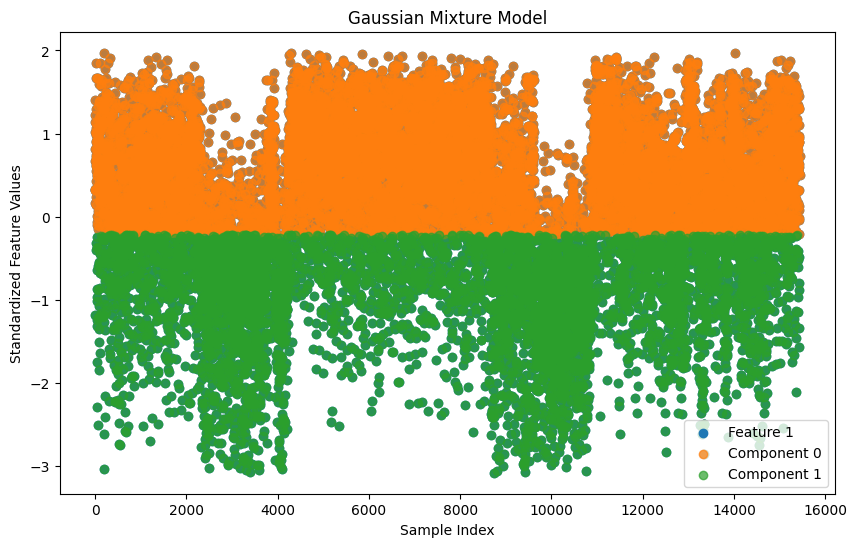

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
# Extract features for GMM (you can choose relevant features based on your problem)
features_for_gmm = df[['danceability']]

# Standardize the features
scaler = StandardScaler()
features_for_gmm_scaled = scaler.fit_transform(features_for_gmm)

# Create a Gaussian Mixture Model
num_components = 2  # You can adjust the number of components based on your problem
gmm = GaussianMixture(n_components=num_components, random_state=42)

# Fit the model to the standardized features
gmm.fit(features_for_gmm_scaled)

# Predict the component assignments for each sample
component_assignments = gmm.predict(features_for_gmm_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot the standardized features
for i in range(features_for_gmm_scaled.shape[1]):
    plt.scatter(np.arange(len(features_for_gmm_scaled)), features_for_gmm_scaled[:, i], label=f'Feature {i+1}')

# Highlight samples with different colors based on their component assignments
for i in range(num_components):
    mask = component_assignments == i
    plt.scatter(np.arange(len(features_for_gmm_scaled))[mask], features_for_gmm_scaled[mask], label=f'Component {i}', alpha=0.7)

plt.title('Gaussian Mixture Model')
plt.xlabel('Sample Index')
plt.ylabel('Standardized Feature Values')
plt.legend()
plt.show()


In [18]:
import pickle
with open("recommend_songs_by_name.pkl", "wb") as f:
    pickle.dump((recommend_songs_by_name(input_song_name,k_value,df),df,Mtr,Mtr1), f)

***REFERENCES***

Dataset: [Spotify Dataset](https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify/data)

1) [neptune.ai/blog/recommender-systems-metrics](https://neptune.ai/blog/recommender-systems-metrics#:~:text=Unfortunately%2C%20accuracy%20doesn't%20go,recommender%20system%20is%20not%20enough.)
2) [https://neptune.ai/blog/how-to-test-recommender-system](https://neptune.ai/blog/how-to-test-recommender-system)
3) [Scikit KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict_proba)
4) [https://www.simplilearn.com/Dimensionality-reduction-article](https://www.simplilearn.com/what-is-dimensionality-reduction-article)
5)  [Probabilistic-model-in-machine-learning](https://www.javatpoint.com/probabilistic-model-in-machine-learning)